In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
df=pd.read_csv('amazon_india_2023.csv')
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2023_00000001,2023-01-16,CUST_2023_00005822,PROD_001899,Xiaomi Watch Premium,Electronics,Smart Watch,Xiaomi,59416.51,0.00,59416.51,2,118833.02,0.0,118833.02,Kanpur,Uttar Pradesh,Tier1,Standard,26-35,UPI,3,Standard,True,False,NaN,4/5,Returned,1,2023,1,0.06,True,4.2
1,TXN_2023_00000002,2023-01-15,CUST_2019_00019403,PROD_000472,Oppo R17 Pro 64GB Black,Electronics,Smartphones,Oppo,19474.76,0.00,19474.76,1,19474.76,NaN,19474.76,Pune,Maharashtra,Tier1,Standard,26-35,Credit Card,4,Standard,False,False,NaN,4.0,Returned,1,2023,1,0.16,True,3.4
2,TXN_2023_00000003,2023-01-10,CUST_2023_00040022,PROD_001759,JBL Neckband,Electronics,Audio,JBL,27097.23,27.71,19588.64,1,19588.64,0.0,19588.64,Lucknow,Uttar Pradesh,Tier1,Standard,18-25,Net Banking,1,Same Day,True,False,NaN,5.0,Delivered,1,2023,1,0.23,True,3.7
3,TXN_2023_00000004,2023-01-04,CUST_2023_00021818,PROD_001158,Xiaomi Redmi Note 12 256GB White,Electronics,Smartphones,Xiaomi,12883.85,0.00,12883.85,1,12883.85,0.0,12883.85,Chennai,Tamil Nadu,Metro,Budget,18-25,Debit Card,3,Standard,False,False,NaN,3.5,Delivered,1,2023,1,0.23,True,4.1
4,TXN_2023_00000005,2023-01-07,CUST_2020_00048935,PROD_000221,Apple iPhone 8 32GB Blue,Electronics,Smartphones,Apple,165637.56,0.00,165637.56,1,165637.56,NaN,165637.56,Chennai,Tamil Nadu,Metro,Premium,26-35,Credit Card,2,Express,True,False,NaN,3.0,Delivered,1,2023,1,0.22,False,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127127,TXN_2023_00010663_DUP,2023-02-10,CUST_2021_00032315,PROD_001683,Apple Mi Pad 8GB RAM Silver,Electronics,Tablets,Apple,90033.17,65.49,31070.55,1,31070.55,0.0,31070.55,Lucknow,Uttar Pradesh,Tier1,Standard,NaN,BNPL,3,Standard,False,True,Valentine Sale,NaN,Delivered,2,2023,1,0.40,True,4.5
127128,TXN_2023_00082508_DUP,2023-09-29,CUST_2022_00015469,PROD_000278,Xiaomi Redmi 4A 16GB White,Electronics,Smartphones,Xiaomi,22108.7,31.35,15178.35,1,15178.35,0.0,15178.35,Lucknow,Uttar Pradesh,Tier1,Standard,55+,UPI,1,Same Day,True,TRUE,Amazon Great Indian Festival,5/5,Delivered,9,2023,3,0.21,True,4.1
127129,TXN_2023_00023903_DUP,2023-03-08,CUST_2019_00016252,PROD_001014,OnePlus OnePlus 10T 64GB White,Electronics,Smartphones,OnePlus,58697.1,23.90,44667.24,1,44667.24,0.0,44667.24,Delhi,Delhi,Metro,Standard,NaN,UPI,3,Standard,True,True,Holi Festival,5.0,Delivered,3,2023,1,0.19,1,4.5
127130,TXN_2023_00093042_DUP,2023-10-04,CUST_2022_00015673,PROD_000195,Motorola Moto G4 32GB Blue,Electronics,Smartphones,Motorola,15514.86,33.62,10298.57,1,10298.57,0.0,10298.57,Saharanpur,Uttar Pradesh,Rural,Budget,18-25,UPI,6,Standard,False,True,Amazon Great Indian Festival,3.0,Delivered,10,2023,4,0.15,1,4.2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127132 entries, 0 to 127131
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          127132 non-null  object 
 1   order_date              127132 non-null  object 
 2   customer_id             127132 non-null  object 
 3   product_id              127132 non-null  object 
 4   product_name            127132 non-null  object 
 5   category                127132 non-null  object 
 6   subcategory             127132 non-null  object 
 7   brand                   127132 non-null  object 
 8   original_price_inr      127132 non-null  object 
 9   discount_percent        127132 non-null  float64
 10  discounted_price_inr    127132 non-null  float64
 11  quantity                127132 non-null  int64  
 12  subtotal_inr            127132 non-null  float64
 13  delivery_charges        116970 non-null  float64
 14  final_amount_inr    

#Question 1
Your dataset contains order_date in multiple formats: 'DD/MM/YYYY', 'DD-MM-YY', 'YYYY-MM-DD', and some invalid entries like '32/13/2020'. Clean and standardize all dates to 'YYYY-MM-DD' format, handling invalid dates appropriately.


In [3]:
df['order_date']=df['order_date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
df['order_date']

,order_date
0,2023-01-16
1,2023-01-15
2,2023-01-10
3,2023-01-04
4,2023-01-07
...,...
127127,2023-02-10
127128,2023-09-29
127129,2023-03-08
127130,2023-10-04


In [4]:
df['order_date'].isnull().sum()

np.int64(0)

In [5]:
mask = df['order_date'].str.match(r'^\d{4}-\d{2}-\d{2}$')

df.loc[mask,'order_date']=pd.to_datetime(df.loc[mask, 'order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2023-01-16 00:00:00
1,2023-01-15 00:00:00
2,2023-01-10 00:00:00
3,2023-01-04 00:00:00
4,2023-01-07 00:00:00
...,...
127127,2023-02-10 00:00:00
127128,2023-09-29 00:00:00
127129,2023-03-08 00:00:00
127130,2023-10-04 00:00:00


In [6]:
df['order_date']=pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2023-01-16
1,2023-01-15
2,2023-01-10
3,2023-01-04
4,2023-01-07
...,...
127127,2023-02-10
127128,2023-09-29
127129,2023-03-08
127130,2023-10-04


#Question 2
The original_price_inr column contains mixed data types: numeric values, text with '₹' symbols, comma separators ('₹1,25,000'), and some entries like 'Price on Request'. Clean this column to contain only numeric values in Indian Rupees.


In [7]:
df['original_price_inr']=df['original_price_inr'].str.replace(r'[^\d.]','',regex=True)
df['original_price_inr']=df['original_price_inr'].astype('float')
df['original_price_inr']

,original_price_inr
0,59416.51
1,19474.76
2,27097.23
3,12883.85
4,165637.56
...,...
127127,90033.17
127128,22108.70
127129,58697.10
127130,15514.86


In [8]:
df['original_price_inr'].isnull().sum()

np.int64(0)

#Question 3
Customer ratings appear in various formats: '5.0', '4 stars', '3/5', '2.5/5.0', and some missing values. Standardize all ratings to numeric scale 1.0-5.0, handling inconsistent formats and missing values strategically.


In [9]:
df['customer_rating'].unique()

array(['4/5', '4.0', '5.0', '3.5', '3.0', nan, '4.5', '5/5', '4',
       '4.5/5.0', '4.0 stars', '3/5', '4.5 stars', '3.5/5.0', '5.0 stars',
       '5.0/5.0', '3', '3.5 stars', '3.0 stars', '4.0/5.0', '5',
       '3.0/5.0'], dtype=object)

In [10]:
df['customer_rating']=df['customer_rating'].str.replace(r'[\/ ].*','',case=False,regex=True).str.strip()

In [11]:
df['customer_rating'].isnull().sum()

np.int64(38484)

In [12]:
df['customer_rating']=df['customer_rating'].replace('',np.nan)

In [13]:
df['customer_rating']=df['customer_rating'].astype(float)

In [14]:
df['customer_rating']

,customer_rating
0,4.0
1,4.0
2,5.0
3,3.5
4,3.0
...,...
127127,NaN
127128,5.0
127129,5.0
127130,3.0


In [15]:
df['customer_rating'].isnull().sum()

np.int64(38484)

In [16]:
df['customer_rating'].mean()
# df['customer_rating'].median()
# df['customer_rating'].mode()

np.float64(4.309211713744247)

In [17]:
df['customer_rating']=df['customer_rating'].fillna(df['customer_rating'].mean())

In [18]:
df['customer_rating'].isnull().sum()

np.int64(0)

#Question 4
The customer_city column has inconsistent naming: 'Bangalore/Bengaluru', 'Mumbai/Bombay', 'Delhi/New Delhi', along with spelling errors and case variations. Standardize all city names and handle geographical variations.


In [19]:
df['customer_city'].unique()

array(['Kanpur', 'Pune', 'Lucknow', 'Chennai', 'Mumbai', 'Surat',
       'Visakhapatnam', 'Chandigarh', 'Bangalore', 'Hyderabad', 'Indore',
       'Saharanpur', 'Moradabad', 'Gorakhpur', 'Nagpur', 'Coimbatore',
       'Ahmedabad', 'Allahabad', 'Delhi', 'Kochi', 'Patna', 'Kolkata',
       'Jaipur', 'Vadodara', 'Meerut', 'Varanasi', 'Bhubaneswar',
       'Bareilly', 'BANGALORE', 'Ludhiana', 'Aligarh', 'Kolkata ',
       'Calcutta', 'Mumbai ', 'chenai', 'Delhi NCR', 'DELHI', 'Madras',
       'Bengaluru', 'delhi', 'CHENNAI', 'kolkata', 'Chennai ', 'Bombay',
       'mumba', 'MUMBAI', 'Bengalore', 'New Delhi', 'KOLKATA', 'Banglore'],
      dtype=object)

In [20]:
!pip install fuzzywuzzy

In [21]:
from fuzzywuzzy import process  # pip install thefuzz

def clean_city_names(df, column):

    manual_mapping = {
        # Mumbai
        'bombay': 'Mumbai',
        'mumba': 'Mumbai',
        'mumbai ': 'Mumbai',
        'mumabi': 'Mumbai',

        # Bengaluru
        'bangalore': 'Bengaluru',
        'banglore': 'Bengaluru',
        'bengalore': 'Bengaluru',

        # Delhi
        'new delhi': 'Delhi',
        'delhi ncr': 'Delhi',
        'delhi ': 'Delhi',

        # Chennai
        'madras': 'Chennai',
        'chenai': 'Chennai',
        'chennai ': 'Chennai',

        # Kolkata
        'calcutta': 'Kolkata',
        'kolkata ': 'Kolkata',
        'kolkata': 'Kolkata',  # lowercase variant
        'kolkatta': 'Kolkata',
    }

    master_list= [
        'Pune', 'Chandigarh', 'Ludhiana', 'Bengaluru', 'Kochi', 'Mumbai',
        'Kanpur', 'Patna', 'Bhubaneswar', 'Delhi', 'Nagpur', 'Indore',
        'Ahmedabad', 'Chennai', 'Kolkata', 'Gorakhpur', 'Visakhapatnam',
        'Hyderabad', 'Lucknow', 'Varanasi', 'Moradabad', 'Jaipur', 'Surat',
        'Coimbatore', 'Vadodara', 'Meerut', 'Aligarh', 'Bareilly', 'Saharanpur',
        'Allahabad'
    ]
    master_list_lower = [c.lower() for c in master_list]


    df[column] = df[column].astype(str).str.lower().str.strip()
    df[column] = df[column].replace({"nan": pd.NA})

    df[column] = df[column].replace(manual_mapping)

    def match_city(city):
        if pd.isna(city):
            return city
        best_match, score = process.extractOne(city, master_list_lower)
        return best_match if score > 85 else city

    df[column] = df[column].apply(match_city)


    df[column] = df[column].apply(lambda x: x.title() if pd.notna(x) else x)

    return df[column]


/usr/local/lib/python3.12/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [22]:
# Get unique city names
unique_cities = df['customer_city'].unique()

# Apply the cleaning function to unique city names
cleaned_unique_cities = [clean_city_names(pd.DataFrame({'city': [city]}), 'city').iloc[0] for city in unique_cities]

# Create a mapping dictionary
city_mapping = dict(zip(unique_cities, cleaned_unique_cities))

# Map the cleaned names back to the original column
df['customer_city'] = df['customer_city'].map(city_mapping)

display(df['customer_city'].unique())

array(['Kanpur', 'Pune', 'Lucknow', 'Chennai', 'Mumbai', 'Surat',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Hyderabad', 'Indore',
       'Saharanpur', 'Moradabad', 'Gorakhpur', 'Nagpur', 'Coimbatore',
       'Ahmedabad', 'Allahabad', 'Delhi', 'Kochi', 'Patna', 'Kolkata',
       'Jaipur', 'Vadodara', 'Meerut', 'Varanasi', 'Bhubaneswar',
       'Bareilly', 'Ludhiana', 'Aligarh'], dtype=object)

In [23]:
df['customer_city'].unique()

array(['Kanpur', 'Pune', 'Lucknow', 'Chennai', 'Mumbai', 'Surat',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Hyderabad', 'Indore',
       'Saharanpur', 'Moradabad', 'Gorakhpur', 'Nagpur', 'Coimbatore',
       'Ahmedabad', 'Allahabad', 'Delhi', 'Kochi', 'Patna', 'Kolkata',
       'Jaipur', 'Vadodara', 'Meerut', 'Varanasi', 'Bhubaneswar',
       'Bareilly', 'Ludhiana', 'Aligarh'], dtype=object)

#Question 5
Boolean columns (is_prime_member, is_prime_eligible, is_festival_sale) contain mixed values: True/False, Yes/No, 1/0, Y/N, and some missing entries. Convert all boolean columns to consistent True/False format.


In [24]:
df['is_prime_member'].unique()

array(['True', 'False', 'TRUE', '0', 'No', '1', 'Yes', 'FALSE'],
      dtype=object)

In [25]:
df['is_prime_eligible'].unique()

array(['True', 'False', 'Yes', 'TRUE', '1', 'FALSE', 'No', '0'],
      dtype=object)

In [26]:
df['is_festival_sale'].unique()

array(['False', 'No', 'True', 'FALSE', '0', 'TRUE', 'Yes', '1'],
      dtype=object)

In [27]:
import pandas as pd

def make_true_false(x):

    if pd.isna(x):
        return pd.NA

    x = str(x).strip().upper()

    if x in ['NAN', 'NONE', 'NULL', '']:
        return pd.NA

    if x in ['NO', 'FALSE', '0']:
        return False
    elif x in ['YES', 'TRUE', '1']:
        return True

    return pd.NA


In [28]:
df['is_festival_sale']=df['is_festival_sale'].apply(make_true_false)
df['is_prime_eligible']=df['is_prime_eligible'].apply(make_true_false)
df['is_prime_member']=df['is_prime_member'].apply(make_true_false)

In [29]:
print(df['is_festival_sale'].unique())
print(df['is_prime_eligible'].unique())
print(df['is_prime_member'].unique())

[False  True]
[ True False]
[ True False]


#Question 6
Product categories have variations: 'Electronics/Electronic/ELECTRONICS/Electronics & Accessories'. Standardize category names across the dataset and ensure consistent naming conventions.


In [30]:
df['category'].unique()

array(['Electronics', 'Electronics & Accessories', 'Electronicss',
       'Electronic', 'ELECTRONICS'], dtype=object)

In [31]:
mapping_cat = {
    'electronics': 'Electronics',
    'electronic': 'Electronics',
    # 'Electronics & Accessories': 'Electronics',
    'ELECTRONICS':'Electronics',
    'Electronic':'Electronics',
    'Electronicss':'Electronics'

}

In [32]:
df['category']=df['category'].replace(mapping_cat)

In [33]:
df['category'].unique()

array(['Electronics', 'Electronics & Accessories'], dtype=object)

#Question 7
The delivery_days column contains negative values, text entries like 'Same Day', '1-2 days', and some unrealistic values like 50 days. Clean this column to contain only valid numeric delivery days.


In [34]:
df['delivery_days'].unique()

array(['3', '4', '1', '2', '5', '6', 'Same Day', '-1', '7', '15',
       '1-2 days', 'Express', '0'], dtype=object)

In [35]:
df.loc[df['delivery_days'].str.contains(r'[1-2|same day]',case=False,na=False),'delivery_days'].sample(10)

,delivery_days
109604,1
60299,2
64472,-1
27222,1
127077,1
25438,1
76686,1
80685,2
73859,1
97580,1


In [36]:
df['delivery_days']=df['delivery_days'].str.replace('1-2','2',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Same Day','1',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Express','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('-','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('2 days','2',case=False)

In [37]:
df['delivery_days'] = df['delivery_days'].replace('', np.nan)
df['delivery_days'] = pd.to_numeric(df['delivery_days'], errors='coerce')
display(df['delivery_days'].unique())

array([ 3.,  4.,  1.,  2.,  5.,  6.,  7., 15., nan,  0.])

In [38]:
df['delivery_days'].isnull().sum()

np.int64(271)

In [39]:
df['delivery_days'] = df['delivery_days'].fillna(df['delivery_days'].mean()).astype(int)

In [40]:
df['delivery_days'].isnull().sum()


np.int64(0)

In [41]:
df['delivery_days'].head()

,delivery_days
0,3
1,4
2,1
3,3
4,2


#Question 8
Identify and handle duplicate transactions where the same customer, product, date, and amount appear multiple times. Some duplicates are genuine (bulk orders) while others are data errors. Develop a strategy to distinguish and handle both cases.


In [42]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
251,TXN_2023_00000252,2023-01-31,CUST_2023_00028413,PROD_000668,Samsung Galaxy S20 128GB White,Electronics,Smartphones,Samsung,91131.00,0.00,91130.98,1,91130.98,0.0,91130.98,Mumbai,Maharashtra,Metro,Standard,36-45,UPI,1,Same Day,True,False,NaN,4.309212,Delivered,1,2023,1,0.21,True,3.2
252,TXN_2023_00000253,2023-01-29,CUST_2023_00037111,PROD_000171,Xiaomi Redmi Note 3 16GB Black,Electronics,Smartphones,Xiaomi,28581.43,0.00,28581.43,1,28581.43,0.0,28581.43,Ahmedabad,Gujarat,Tier1,Standard,NaN,UPI,3,Standard,False,False,NaN,4.500000,Delivered,1,2023,1,0.20,False,4.3
326,TXN_2023_00000327,2023-01-14,CUST_2022_00008910,PROD_000885,Xiaomi Poco F3 256GB White,Electronics,Smartphones,Xiaomi,19739.71,0.00,19739.71,1,19739.71,0.0,19739.71,Mumbai,Maharashtra,Metro,Standard,18-25,Credit Card,3,Standard,False,False,NaN,4.309212,Delivered,1,2023,1,0.23,True,4.4
337,TXN_2023_00000338,2023-01-09,CUST_2023_00026453,PROD_000592,Realme Realme X 128GB Blue,Electronics,Smartphones,Realme,19456.03,0.00,19456.03,1,19456.03,0.0,19456.03,Chennai,Tamil Nadu,Metro,Budget,36-45,Credit Card,6,Standard,False,False,NaN,3.500000,Delivered,1,2023,1,0.16,False,4.4
345,TXN_2023_00000346,2023-01-07,CUST_2023_00010735,PROD_001105,Samsung Galaxy S23 256GB Black,Electronics,Smartphones,Samsung,133706.91,19.43,107722.64,1,107722.64,0.0,107722.64,Ahmedabad,Gujarat,Tier1,Premium,26-35,COD,2,Express,True,False,NaN,4.500000,Cancelled,1,2023,1,0.18,True,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127127,TXN_2023_00010663_DUP,2023-02-10,CUST_2021_00032315,PROD_001683,Apple Mi Pad 8GB RAM Silver,Electronics,Tablets,Apple,90033.17,65.49,31070.55,1,31070.55,0.0,31070.55,Lucknow,Uttar Pradesh,Tier1,Standard,NaN,BNPL,3,Standard,False,True,Valentine Sale,4.309212,Delivered,2,2023,1,0.40,True,4.5
127128,TXN_2023_00082508_DUP,2023-09-29,CUST_2022_00015469,PROD_000278,Xiaomi Redmi 4A 16GB White,Electronics,Smartphones,Xiaomi,22108.70,31.35,15178.35,1,15178.35,0.0,15178.35,Lucknow,Uttar Pradesh,Tier1,Standard,55+,UPI,1,Same Day,True,True,Amazon Great Indian Festival,5.000000,Delivered,9,2023,3,0.21,True,4.1
127129,TXN_2023_00023903_DUP,2023-03-08,CUST_2019_00016252,PROD_001014,OnePlus OnePlus 10T 64GB White,Electronics,Smartphones,OnePlus,58697.10,23.90,44667.24,1,44667.24,0.0,44667.24,Delhi,Delhi,Metro,Standard,NaN,UPI,3,Standard,True,True,Holi Festival,5.000000,Delivered,3,2023,1,0.19,True,4.5
127130,TXN_2023_00093042_DUP,2023-10-04,CUST_2022_00015673,PROD_000195,Motorola Moto G4 32GB Blue,Electronics,Smartphones,Motorola,15514.86,33.62,10298.57,1,10298.57,0.0,10298.57,Saharanpur,Uttar Pradesh,Rural,Budget,18-25,UPI,6,Standard,False,True,Amazon Great Indian Festival,3.000000,Delivered,10,2023,4,0.15,True,4.2


In [43]:
df=df.drop_duplicates(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'],keep='first')

In [44]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating


#Question 9
The dataset contains outlier prices where some products show prices 100x higher than expected due to data entry errors (decimal point issues). Identify and correct these outliers using statistical methods and domain knowledge.


In [45]:
df.loc[:,['product_name','original_price_inr']]

,product_name,original_price_inr
0,Xiaomi Watch Premium,59416.51
1,Oppo R17 Pro 64GB Black,19474.76
2,JBL Neckband,27097.23
3,Xiaomi Redmi Note 12 256GB White,12883.85
4,Apple iPhone 8 32GB Blue,165637.56
...,...,...
126495,ASUS Gaming 8GB RAM Silver,57714.17
126496,LG Smart TV,127421.98
126497,OnePlus OnePlus 6 64GB Black,54125.84
126498,Xiaomi Slate 4GB RAM Silver,34590.88


In [46]:
df['original_price_inr']

,original_price_inr
0,59416.51
1,19474.76
2,27097.23
3,12883.85
4,165637.56
...,...
126495,57714.17
126496,127421.98
126497,54125.84
126498,34590.88


<Axes: >

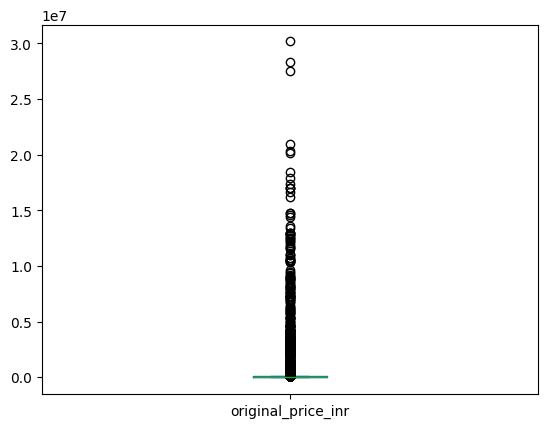

In [47]:
df['original_price_inr'].plot(kind='box')

In [48]:
df['original_price_inr'].describe()

,original_price_inr
count,1.265000e+05
mean,7.319805e+04
std,3.656862e+05
min,1.076520e+03
25%,2.623190e+04
50%,3.927490e+04
75%,8.058701e+04
max,3.018865e+07


In [49]:
Q1=df['original_price_inr'].quantile(0.25)
Q3=df['original_price_inr'].quantile(0.75)
Q3,Q1

(np.float64(80587.01), np.float64(26231.9))

In [50]:
IQR=Q3-Q1
IQR

np.float64(54355.10999999999)

In [51]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [52]:
lower_limit,upper_limit

(np.float64(-55300.76499999999), np.float64(162119.675))

In [53]:
df[((df['original_price_inr'] < lower_limit) | (df['original_price_inr'] > upper_limit))]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
4,TXN_2023_00000005,2023-01-07,CUST_2020_00048935,PROD_000221,Apple iPhone 8 32GB Blue,Electronics,Smartphones,Apple,165637.56,0.00,165637.56,1,165637.56,NaN,165637.56,Chennai,Tamil Nadu,Metro,Premium,26-35,Credit Card,2,Express,True,False,NaN,3.000000,Delivered,1,2023,1,0.22,False,3.5
24,TXN_2023_00000025,2023-01-14,CUST_2020_00033849,PROD_000489,Apple iPhone 11 Pro 128GB Black,Electronics,Smartphones,Apple,194115.74,0.00,194115.74,2,388231.48,0.0,388231.48,Mumbai,Maharashtra,Metro,Premium,NaN,UPI,2,Express,True,False,NaN,4.500000,Delivered,1,2023,1,0.17,True,4.0
26,TXN_2023_00000027,2023-01-09,CUST_2021_00042774,PROD_001625,Apple Ultrabook 8GB RAM Black,Electronics,Laptops,Apple,243080.32,0.00,243080.32,1,243080.32,0.0,243080.32,Mumbai,Maharashtra,Metro,Premium,46-55,Credit Card,1,Same Day,True,False,NaN,4.000000,Delivered,1,2023,1,1.85,True,3.3
27,TXN_2023_00000028,2023-01-17,CUST_2022_00046029,PROD_000950,Apple iPhone 14 256GB White,Electronics,Smartphones,Apple,279514.90,20.55,222069.85,1,222069.85,0.0,222069.85,Mumbai,Maharashtra,Metro,Premium,26-35,COD,2,Express,True,False,NaN,4.309212,Delivered,1,2023,1,0.23,True,3.9
54,TXN_2023_00000055,2023-01-23,CUST_2022_00034539,PROD_001088,Apple iPhone 15 Pro 128GB White,Electronics,Smartphones,Apple,291804.40,61.73,111667.16,2,223334.32,0.0,223334.32,Chennai,Tamil Nadu,Metro,Premium,36-45,Net Banking,2,Express,True,True,Republic Day Sale,5.000000,Delivered,1,2023,1,0.20,True,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126427,TXN_2023_00126428,NaT,CUST_2023_00026227,PROD_001057,Nothing Phone (1) 64GB White,Electronics,Smartphones,Nothing,250882.00,25.60,18665.51,1,18665.51,0.0,18665.51,Chandigarh,Punjab,Tier2,Standard,46-55,Debit Card,4,Standard,False,False,NaN,4.500000,Delivered,12,2023,4,0.21,True,3.7
126437,TXN_2023_00126438,2023-12-28,CUST_2023_00014533,PROD_001608,Apple ThinkPad 4GB RAM Black,Electronics,Laptops,Apple,202244.00,9.07,183894.00,1,183894.00,0.0,183894.00,Lucknow,Uttar Pradesh,Tier1,Premium,NaN,UPI,1,Same Day,True,False,NaN,5.000000,Delivered,12,2023,4,1.70,True,4.5
126460,TXN_2023_00126461,2023-12-11,CUST_2023_00026780,PROD_000832,Samsung Galaxy S21+ 256GB Black,Electronics,Smartphones,Samsung,10754184.00,0.00,107541.84,1,107541.84,0.0,107541.84,Coimbatore,Tamil Nadu,Tier2,Standard,18-25,COD,1,Same Day,True,False,NaN,3.500000,Delivered,12,2023,4,0.23,True,3.4
126461,TXN_2023_00126462,2023-12-05,CUST_2021_00001988,PROD_000798,Apple iPhone 13 128GB White,Electronics,Smartphones,Apple,206394.60,0.00,206394.60,1,206394.60,0.0,206394.60,Delhi,Delhi,Metro,Premium,36-45,UPI,1,Same Day,True,False,NaN,5.000000,Delivered,12,2023,4,0.21,True,4.1


In [54]:
df=df[(df['original_price_inr']>=lower_limit)&(df['original_price_inr']<=upper_limit)]

In [55]:
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2023_00000001,2023-01-16,CUST_2023_00005822,PROD_001899,Xiaomi Watch Premium,Electronics,Smart Watch,Xiaomi,59416.51,0.00,59416.51,2,118833.02,0.0,118833.02,Kanpur,Uttar Pradesh,Tier1,Standard,26-35,UPI,3,Standard,True,False,NaN,4.000000,Returned,1,2023,1,0.06,True,4.2
1,TXN_2023_00000002,2023-01-15,CUST_2019_00019403,PROD_000472,Oppo R17 Pro 64GB Black,Electronics,Smartphones,Oppo,19474.76,0.00,19474.76,1,19474.76,NaN,19474.76,Pune,Maharashtra,Tier1,Standard,26-35,Credit Card,4,Standard,False,False,NaN,4.000000,Returned,1,2023,1,0.16,True,3.4
2,TXN_2023_00000003,2023-01-10,CUST_2023_00040022,PROD_001759,JBL Neckband,Electronics,Audio,JBL,27097.23,27.71,19588.64,1,19588.64,0.0,19588.64,Lucknow,Uttar Pradesh,Tier1,Standard,18-25,Net Banking,1,Same Day,True,False,NaN,5.000000,Delivered,1,2023,1,0.23,True,3.7
3,TXN_2023_00000004,2023-01-04,CUST_2023_00021818,PROD_001158,Xiaomi Redmi Note 12 256GB White,Electronics,Smartphones,Xiaomi,12883.85,0.00,12883.85,1,12883.85,0.0,12883.85,Chennai,Tamil Nadu,Metro,Budget,18-25,Debit Card,3,Standard,False,False,NaN,3.500000,Delivered,1,2023,1,0.23,True,4.1
5,TXN_2023_00000006,NaT,CUST_2023_00016926,PROD_000987,Samsung Galaxy S22 Ultra 128GB White,Electronics,Smartphones,Samsung,102017.58,16.10,85590.58,1,85590.58,0.0,85590.58,Mumbai,Maharashtra,Metro,Standard,46-55,UPI,5,Standard,False,False,NaN,5.000000,Delivered,1,2023,1,0.16,True,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126495,TXN_2023_00126496,2023-12-02,CUST_2023_00013570,PROD_001582,ASUS Gaming 8GB RAM Silver,Electronics,Laptops,ASUS,57714.17,0.00,57714.17,2,115428.34,NaN,115428.34,Indore,Madhya Pradesh,Tier1,Standard,26-35,UPI,2,Express,True,False,NaN,4.309212,Delivered,12,2023,4,2.02,False,3.8
126496,TXN_2023_00126497,2023-12-20,CUST_2018_00012855,PROD_001995,LG Smart TV,Electronics,TV & Entertainment,LG,127421.98,10.02,114659.05,1,114659.05,NaN,114659.05,Bengaluru,Karnataka,Metro,Standard,26-35,UPI,5,Standard,False,False,NaN,5.000000,Delivered,12,2023,4,22.58,True,3.5
126497,TXN_2023_00126498,2023-12-01,CUST_2023_00031112,PROD_000385,OnePlus OnePlus 6 64GB Black,Electronics,Smartphones,OnePlus,54125.84,17.66,44565.89,1,44565.89,0.0,44565.89,Lucknow,Uttar Pradesh,Tier1,Standard,18-25,Credit Card,3,Standard,True,False,NaN,5.000000,Delivered,12,2023,4,0.19,True,4.1
126498,TXN_2023_00126499,2023-12-05,CUST_2023_00010267,PROD_001728,Xiaomi Slate 4GB RAM Silver,Electronics,Tablets,Xiaomi,34590.88,0.00,34590.88,2,69181.76,0.0,69181.76,Delhi,Delhi,Metro,Standard,26-35,UPI,1,Same Day,True,False,NaN,4.000000,Delivered,12,2023,4,0.49,True,4.2


#Question 10
Payment methods contain inconsistent naming: 'UPI/PhonePe/GooglePay', 'Credit Card/CREDIT_CARD/CC', 'Cash on Delivery/COD/C.O.D'. Standardize payment method categories and create a clean categorical hierarchy.


In [56]:
df['payment_method'].unique()

array(['UPI', 'Credit Card', 'Net Banking', 'Debit Card', 'COD', 'BNPL',
       'Wallet'], dtype=object)

In [57]:
mapping_payment_method = {
    'COD': 'Cash',
    'UPI': 'UPI',
    'Debit Card': 'Card',
    'Credit Card': 'Card',
    'Net Banking': 'Online Banking',
    'Wallet': 'Wallet',
    'BNPL': 'BNPL'
}

df['payment_method'] = df['payment_method'].replace(mapping_payment_method)

In [58]:
df['payment_method'].unique()

array(['UPI', 'Card', 'Online Banking', 'Cash', 'BNPL', 'Wallet'],
      dtype=object)

In [59]:
df.isnull().sum()

,0
transaction_id,0
order_date,11653
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [60]:
df['delivery_charges'].sample(10)

,delivery_charges
65600,NaN
14794,0.0
8945,0.0
65289,0.0
83803,0.0
102467,0.0
54453,0.0
59695,NaN
65701,0.0
85166,0.0


In [61]:
df['delivery_charges'].isnull().sum()

np.int64(9695)

In [62]:
df['delivery_charges']=df['delivery_charges'].fillna(df['delivery_charges'].mean())

In [63]:
df['customer_age_group'].unique()

array(['26-35', '18-25', '46-55', nan, '36-45', '55+'], dtype=object)

In [64]:
mapping_age_group = {
    '18-25': 'Group-1',
    '26-35': 'Group-2',
    '36-45': 'Group-3',
    '46-55': 'Group-4',
    '55+':   'Group-5'
}

df['customer_age_group'] = df['customer_age_group'].replace(mapping_age_group)

In [65]:
df['customer_age_group'].unique()

array(['Group-2', 'Group-1', 'Group-4', nan, 'Group-3', 'Group-5'],
      dtype=object)

In [66]:
# df['customer_age_group'].mode()[0]
df['customer_age_group']=df['customer_age_group'].fillna(df['customer_age_group'].mode()[0])

In [67]:
df['customer_age_group'].isnull().sum()

np.int64(0)

In [68]:
df.isnull().sum()

,0
transaction_id,0
order_date,11653
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [69]:
df=df.drop(columns=['festival_name'])

In [70]:
df.isnull().sum()

,0
transaction_id,0
order_date,11653
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120978 entries, 0 to 126499
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   transaction_id          120978 non-null  object        
 1   order_date              109325 non-null  datetime64[ns]
 2   customer_id             120978 non-null  object        
 3   product_id              120978 non-null  object        
 4   product_name            120978 non-null  object        
 5   category                120978 non-null  object        
 6   subcategory             120978 non-null  object        
 7   brand                   120978 non-null  object        
 8   original_price_inr      120978 non-null  float64       
 9   discount_percent        120978 non-null  float64       
 10  discounted_price_inr    120978 non-null  float64       
 11  quantity                120978 non-null  int64         
 12  subtotal_inr            120978 non-

In [72]:
df.to_csv('cleaned_2023.csv')